In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [95]:
df_train  = pd.read_csv('twitter_validation.csv', header=None)

from matplotlib import rcParams

rcParams['font.family'] = 'DejaVu Sans'

In [99]:
column_names = ["ID", "Topic", "Sentiment", "Tweet"]
df_train.columns = column_names
df_train["ID"] = pd.to_numeric(df_train["ID"], errors="coerce").astype("Int64")


df_train = df_train.dropna(subset=["Tweet"])
duplicates_train = df_train.duplicated().sum()

df_train = df_train.drop_duplicates()
duplicates_train_after = df_train.duplicated().sum()


df_train.info('count')

(duplicates_train, duplicates_train_after)

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         999 non-null    Int64 
 1   Topic      999 non-null    object
 2   Sentiment  999 non-null    object
 3   Tweet      999 non-null    object
dtypes: Int64(1), object(3)
memory usage: 40.0+ KB


(0, 0)

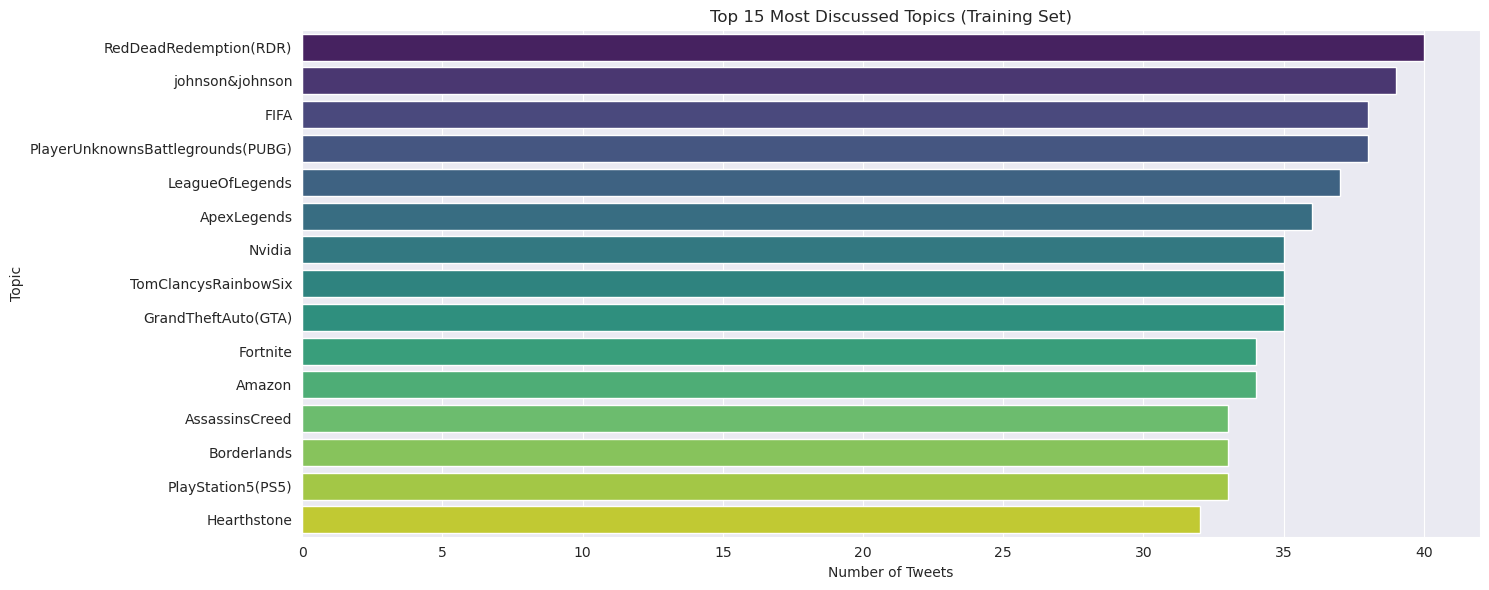

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

top_topics = df_train["Topic"].value_counts().head(15)


plt.figure(figsize=(15, 6))
sns.barplot(x=top_topics.values, y=top_topics.index, hue=top_topics.index, palette="viridis", legend=False)



plt.xlabel("Number of Tweets")
plt.ylabel("Topic")
plt.title("Top 15 Most Discussed Topics (Training Set)")
plt.tight_layout()
plt.show()

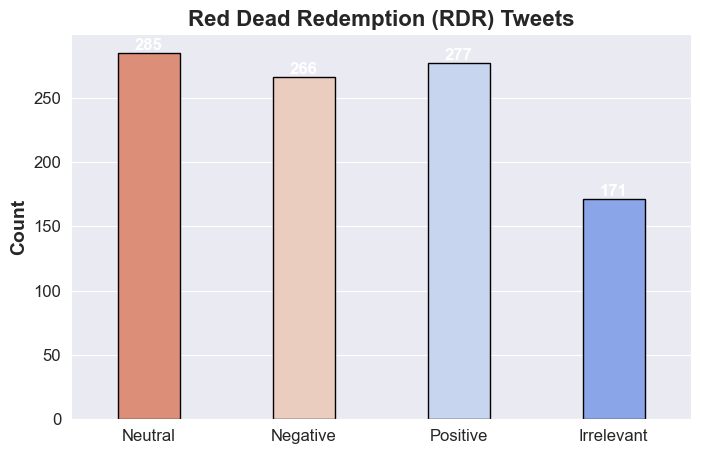

In [103]:

sns.set_style("darkgrid")


plt.figure(figsize=(8, 5))
ax = sns.countplot(
    x="Sentiment", 
    data=df_train, 
    hue="Sentiment", 
    palette="coolwarm_r",  
    legend=False, 
    edgecolor="black",  
    width=0.4  
)


for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', 
        fontsize=12, fontweight='bold', color='white'
    )


plt.xlabel("", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.title("Red Dead Redemption (RDR) Tweets", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()


In [131]:
from matplotlib import rcParams
rcParams['font.family'] = 'Apple Color Emoji'



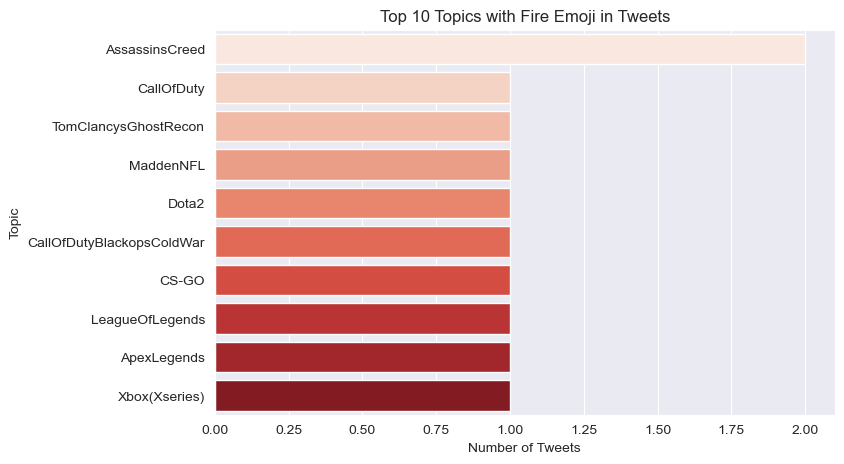

Topic
AssassinsCreed               2
CallOfDuty                   1
TomClancysGhostRecon         1
MaddenNFL                    1
Dota2                        1
CallOfDutyBlackopsColdWar    1
CS-GO                        1
LeagueOfLegends              1
ApexLegends                  1
Xbox(Xseries)                1
Name: count, dtype: int64

In [137]:
def count_emoji_by_topic(df, emoji_char, top_n=10):
    df_copy = df.copy()
    df_copy.columns = df_copy.columns.str.strip()  

    tweet_col = None
    for col in df_copy.columns:
        if "tweet" in col.lower():  
            tweet_col = col
            break
    
    if tweet_col is None:
        print("Error: Could not find a 'Tweet' column! Available columns:", df_copy.columns)
        return

    df_copy[tweet_col] = df_copy[tweet_col].fillna("")
    emoji_tweets = df_copy[df_copy[tweet_col].str.contains(re.escape(emoji_char), na=False)]
    emoji_topic_counts = emoji_tweets["Topic"].value_counts().head(top_n)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=emoji_topic_counts.values, y=emoji_topic_counts.index, hue=emoji_topic_counts.index, palette="Reds", legend=False)
    plt.xlabel("Number of Tweets")
    plt.ylabel("Topic")

    
    plt.title(f"Top {top_n} Topics with Fire Emoji in Tweets")

    plt.show()

    return emoji_topic_counts



count_emoji_by_topic(df_train, fire_emoji_unicode)






In [135]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Arial'  

